## 2.1 - Interpolation

### 2.1.1 - 1D Interpolation

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np

In [ ]:
x = np.arange(0, 10)
y = np.exp(-x/3.0)

In [ ]:
plt.scatter(x, y)
plt.show()

In [ ]:
f = interpolate.interp1d(x, y)
xnew = np.arange(0, 9, 0.01)
ynew = f(xnew)
plt.scatter(x,y, color='blue')
plt.plot(xnew,ynew, color='green')
plt.plot()

kind : str or int, optional
Specifies the kind of interpolation as a string (‘linear’, ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’ where ‘zero’, ‘slinear’, ‘quadratic’ and ‘cubic’ refer to a spline interpolation of zeroth, first, second or third order) or as an integer specifying the order of the spline interpolator to use. Default is ‘linear’.

In [ ]:
f = interpolate.interp1d(x, y, kind='cubic')
xnew = np.arange(0, 9, 0.01)
ynew = f(xnew)
plt.scatter(x,y, color='blue')
plt.plot(xnew,ynew, color='green')
plt.plot()

With f defined you can now do integrals and derivatives, as we'll see ahead.

### 2.1.2 - 2D interpolation 

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def func(x, y):
    return (x+y)*np.exp(-2.0*(x**2 + y**2))

In [3]:
x, y = np.mgrid[-1:1:25j, -1:1:25j]

In [4]:
fval = func(x, y)

<IPython.core.display.Javascript object>


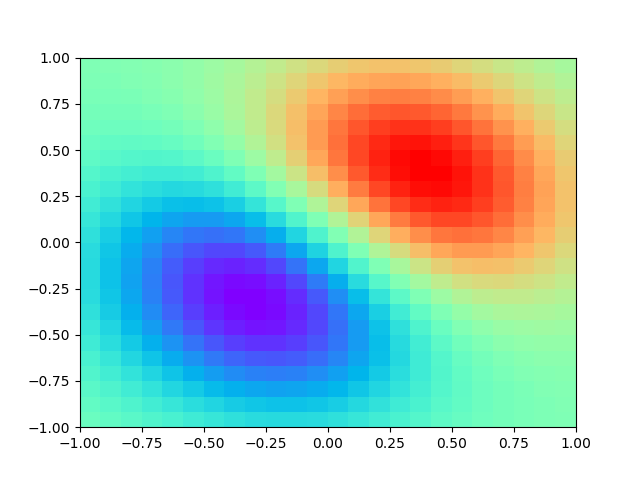

In [5]:
plt.pcolormesh(x, y, fval, cmap='rainbow')
plt.show()

In [6]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


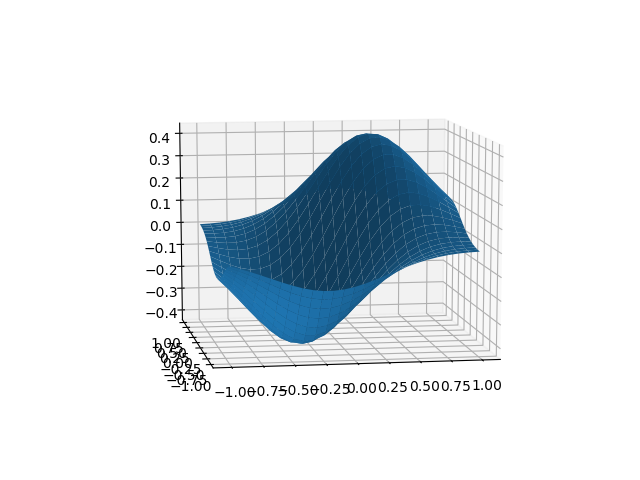

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, fval)

In [ ]:
%matplotlib --list

<IPython.core.display.Javascript object>


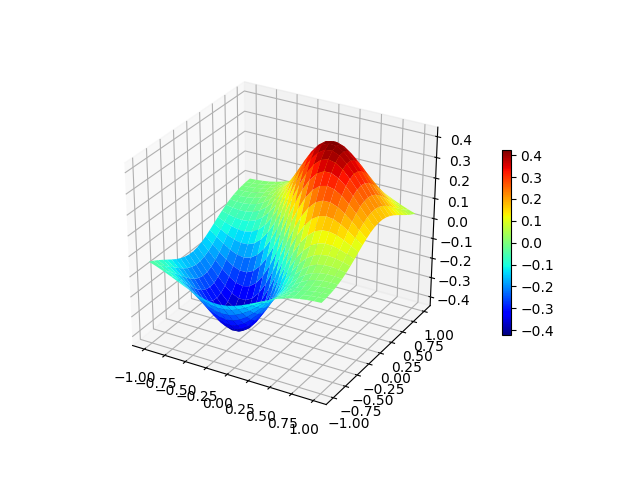

In [14]:
#For pop-up plots you need to restart the notebook kernel 
%matplotlib notebook
#Reimport the module
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sf = ax.plot_surface(x, y, fval, cmap='jet')
fig.colorbar(sf, shrink=0.5)

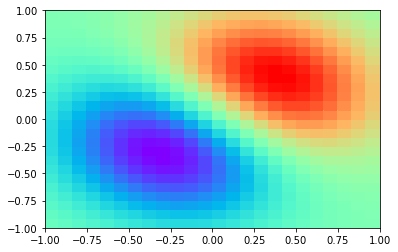

In [15]:
%matplotlib inline
plt.pcolormesh(x, y, fval, cmap='rainbow')
plt.show()

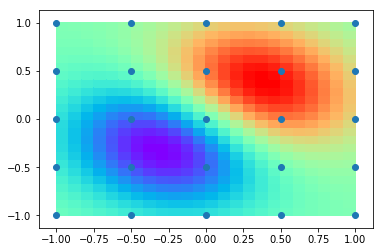

In [16]:
#Example for the mapping: ypu now want to either sample the surface or to increase the number of points
xi, yi = np.mgrid[-1:1:5j, -1:1:5j]
plt.pcolormesh(x, y, fval, cmap='rainbow')
plt.scatter(xi, yi)
plt.show()

In [17]:
from scipy import interpolate

In [18]:
f = interpolate.interp2d(x, y, fval, kind='cubic')

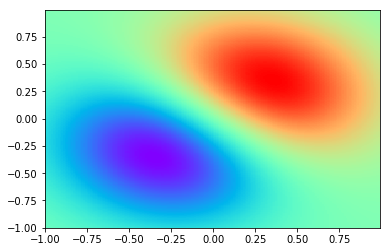

In [19]:
xn = np.arange(-1, 1, 0.01)
yn = np.arange(-1, 1, 0.01)
plt.pcolormesh(xn, yn, f(xn, yn), cmap='rainbow')
plt.show()

## 2.2 Data smoothing

From [wikipedia](https://en.wikipedia.org/wiki/Smoothing):

_In statistics and image processing, to smooth a data set is to create an approximating function that attempts to capture important patterns in the data, while leaving out noise or other fine-scale structures/rapid phenomena._

### 2.2.1 - Moving average

In [28]:
import matplotlib.pyplot as plt
import numpy as np

In [42]:
x = np.arange(-5, 5, 0.1)
y = np.sin(x) + 0.25*np.random.rand(len(x))

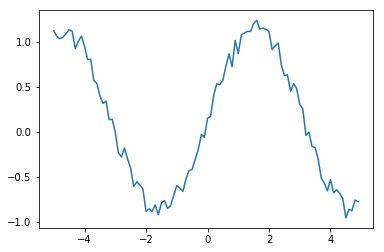

In [43]:
plt.plot(x,y)

In [60]:
def mov_avg(x, N=5):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]

In [61]:
N=5
np.ones((N,))/N

array([ 0.2,  0.2,  0.2,  0.2,  0.2])

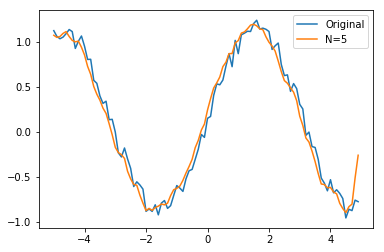

In [59]:
plt.plot(x, y, label='Original')
plt.plot(x, mov_avg(y,3), label='N=5')
plt.legend()
plt.show()

### 2.2.2 - Savitzky-Golay

In [72]:
import webbrowser
webbrowser.open('https://docs.scipy.org/doc/scipy/reference/release.0.19.0.html')

True

In [66]:
from scipy.signal import savgol_filter

In [77]:
ysg = savgol_filter(y, 5, 2)

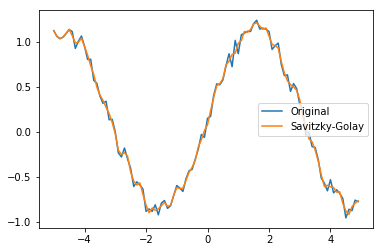

In [78]:
plt.plot(x, y, label='Original')
plt.plot(x, ysg, label='Savitzky-Golay')
plt.legend()
plt.show()

### 2.2.3 - Splines

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

[]

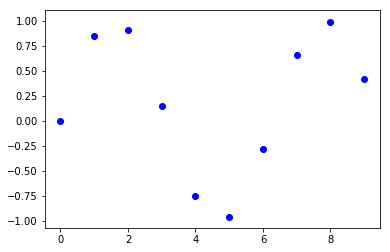

In [22]:
x = np.arange(10)
y = np.sin(x)
plt.scatter(x,y, color='blue')
plt.plot()

In [23]:
cs = CubicSpline(x, y)
xs = np.arange(-0.5, 9.6, 0.1)

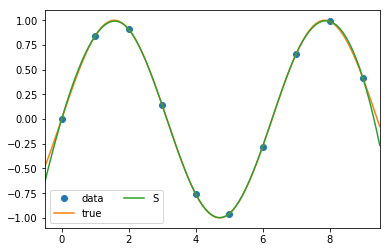

In [24]:
plt.plot(x, y, 'o', label='data')
plt.plot(xs, np.sin(xs), label='true')
plt.plot(xs, cs(xs), label="S")
plt.xlim(-0.5, 9.5)
plt.legend(loc='lower left', ncol=2)
plt.show()

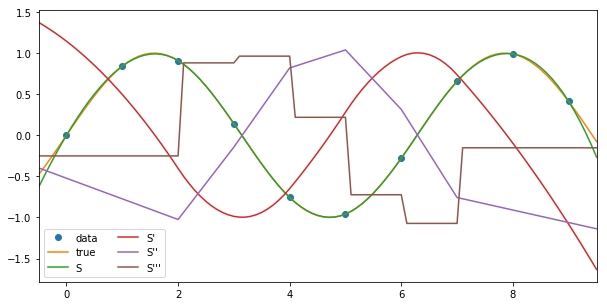

In [25]:
plt.figure(figsize=(10,5))
plt.plot(x, y, 'o', label='data')
plt.plot(xs, np.sin(xs), label='true')
plt.plot(xs, cs(xs), label="S")
plt.plot(xs, cs(xs, 1), label="S'")
plt.plot(xs, cs(xs, 2), label="S''")
plt.plot(xs, cs(xs, 3), label="S'''")
plt.xlim(-0.5, 9.5)
plt.legend(loc='lower left', ncol=2)
plt.show()